# index
## 결측치
- dataset-load : house-prices-advanced-regression-techniques
- 결측치 확인
- 결측치 삭제
- zero, mean, median, min, max, freq
- groupby 활용: 특정 컬럼을 기준으로 평균값, 중앙값
- 시계열 데이터: 앞에 값, 뒤에 값 채우기
- 시계열 데이터: 보간법
- sklearn.impute 활용
-----
## 아웃라이어
- 간단한 아웃라이어 제거법

In [90]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
from sklearn import preprocessing
import category_encoders as ce


# Data load & View (house-prices)

In [91]:
path_house = "test/train (1).csv"
df = pd.read_csv(path_house)
print(df.shape)
df.head()
#1460행 81열

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Imputation 결측치 처리
- 결측치 확인
- 결측치 삭제
- zero, mean, median, min, max, freq
- groupby 활용: 특정 컬럼을 기준으로 평균값, 중앙값
- 시계열 데이터: 앞에 값, 뒤에 값 채우기
- 시계열 데이터: 보간법
- sklearn.impute 활용

In [92]:
##결측치 화인
df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [93]:
#결측치 삭제
df = pd.read_csv
cols=['Alley', 'PoolQC']
df = df.drop(cols, axis=1) #Alley와 PoolQc를 삭제

AttributeError: 'function' object has no attribute 'drop'

### zero, mean, median, min, max, freq

In [94]:
df = pd.read_csv(path_house)
col = ["LotFrontage"]
#zero
df[col] = df[col].fillna(0)
# mean
df[col] = df[col].fillna(df[col].mean())
# median
df[col] = df[col].fillna(df[col].median())
# min
df[col] = df[col].fillna(df[col].min())
# max
df[col] = df[col].fillna(df[col].max())
#freq(최빈값)
# df[col] = df[col].fillna(df[col].mode()[0])

## 시계열 데이터: 앞에 값, 뒤에 값 채우기

In [95]:
df = pd.read_csv(path_house)
col = ["LotFrontage"]
# 앞 값으로 채우기
df[col] = df[col].fillna(method='ffill')
# 뒷 값으로 채우기
df[col] = df[col].fillna(method='bfill')

# Outlier(아웃라이어)

Text(0, 0.5, 'SalePrice')

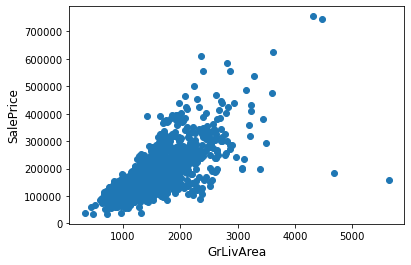

In [96]:
df = pd.read_csv(path_house)
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
# 그림에 점이 엇나가있는게 아웃라이어
#밑에 보이는 그림의 점이 모여있는 쪽만 쓰게 자를거임

Text(0, 0.5, 'SalePrice')

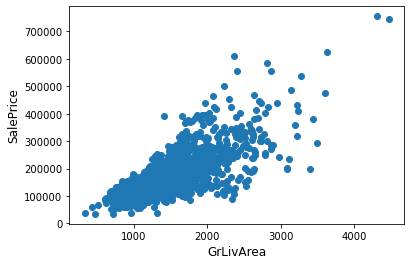

In [97]:
outlier = df[(df['GrLivArea']>4000)&(df['SalePrice']<500000)].index
df=df.drop(outlier, axis=0)
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)

# Categorical Features(범주형)
- Label encoding
- Onehot encoding
- Count encoding
- LabelCount encoding (랭킹)
- Hash encoding
- Sum Encoding
- Polynomial Encoder
- Target(Mean) encoding

In [98]:
df = pd.read_csv(path_house)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [99]:
df = pd.read_csv(path_house)
col = ['MSZoning']
cols = ['MSZoning', 'Neighborhood']
# Object -> Categorical
# 1개 변환
df[col] = df[col].astype('category') #astype 변환 시켜주는 메소드
# 여러개 변환
for c in cols :
    df[c] = df[c].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

### Label encoding


In [100]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(path_house)
cols = ['SaleType', 'SaleCondition']
display(df[cols].head(1))
for col in tqdm_notebook(cols):
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])
display(df[cols].head(1))

,SaleType,SaleCondition
0,WD,Normal


  0%|          | 0/2 [00:00<?, ?it/s]

,SaleType,SaleCondition
0,8,4


### Onehot encoding
예로 내가 자연어 처리를 할 때 원하는 내용을 뺴곤 모두 0처리

In [101]:
# 원핫 인코딩
df = pd.read_csv(path_house)
cols = ['SaleType', 'SaleCondition']
display(df.head(1))
df_oh = pd.get_dummies(df[cols])
df = pd.concat([df, df_oh], axis=1)
df = df.drop(cols, axis=1)
display(df.head(1))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [102]:
# 카운터 인코딩
df = pd.read_csv(path_house)
col =['MSZoning']
display(df[col].head(1))
for col in tqdm_notebook(cols):
    count_enc = ce.CountEncoder()
    df[col]=count_enc.fit_transform(df[col])
display(df[col].head(1))

,MSZoning
0,RL


  0%|          | 0/2 [00:00<?, ?it/s]

0    1198
Name: SaleCondition, dtype: int64

### Target(Mean) encoding


In [103]:
df = pd.read_csv(path_house)
y = df['LotArea']
X = df['SaleCondition']
ce_target = ce.TargetEncoder(cols = ['SaleCondition'])
ce_target.fit(X, y)
ce_target.transform(X, y)

,SaleCondition
0,10543.478297
1,10543.478297
2,10543.478297
3,9450.801980
4,10543.478297
...,...
1455,10543.478297
1456,10543.478297
1457,10543.478297
1458,10543.478297


### 이진화 (0 또는 1)

In [104]:
df = pd.read_csv(path_house)
col =['LotArea']
binarizer = preprocessing.Binarizer(threshold=10000)
b = binarizer.transform(df[col])
b = pd.DataFrame(b)
display(df[col])
display(b)

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


,0
0,0
1,0
2,1
3,0
4,1
...,...
1455,0
1456,1
1457,0
1458,0


# Date Feature

In [105]:
df = pd.DataFrame({'일시':['2020.7.1 19:00',
                   '2020.8.1 20:10',
                   '2021.9.1 21:20',
                   '2022.10.1 22:30',
                   '2022.11.1 23:30',
                   '2022.12.1 23:40',
                   '2023.1.1 08:30']})
df

,일시
0,2020.7.1 19:00
1,2020.8.1 20:10
2,2021.9.1 21:20
3,2022.10.1 22:30
4,2022.11.1 23:30
5,2022.12.1 23:40
6,2023.1.1 08:30


In [106]:
# s1
df = df.assign(
               year=df.일시.dt.year,
               month=df.일시.dt.month,
               day=df.일시.dt.day,
               hour=df.일시.dt.hour,
               minute=df.일시.dt.minute,
               quarter=df.일시.dt.quarter,
               weekday=df.일시.dt.weekday,
               weekofyear=df.일시.dt.weekofyear,
               month_start=df.일시.dt.is_month_start,
               month_end=df.일시.dt.is_month_end,
               quarter_start=df.일시.dt.is_quarter_start,
               quarter_end=df.일시.dt.is_quarter_end,
               daysinmonth=df.일시.dt.daysinmonth
               )

AttributeError: Can only use .dt accessor with datetimelike values

In [107]:
# 문자열을 datetime 타입으로 변경
df['일시'] = df.일시.apply(pd.to_datetime)


In [108]:
display(df)

,일시
0,2020-07-01 19:00:00
1,2020-08-01 20:10:00
2,2021-09-01 21:20:00
3,2022-10-01 22:30:00
4,2022-11-01 23:30:00
5,2022-12-01 23:40:00
6,2023-01-01 08:30:00


In [109]:
# datetime 타입에서 년, 월, 일, 시간 추출
#2
df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)
df['hour'] = df.일시.apply(lambda x: x.hour)
df['minute'] = df.일시.apply(lambda x: x.minute)
#3
df['weekday'] = df['일시'].dt.weekday
df['weekofyear'] = df["일시"].dt.weekofyear
df['quarter'] = df["일시"].dt.quarter
display(df)

,일시,year,month,day,hour,minute,weekday,weekofyear,quarter
0,2020-07-01 19:00:00,2020,7,1,19,0,2,27,3
1,2020-08-01 20:10:00,2020,8,1,20,10,5,31,3
2,2021-09-01 21:20:00,2021,9,1,21,20,2,35,3
3,2022-10-01 22:30:00,2022,10,1,22,30,5,39,4
4,2022-11-01 23:30:00,2022,11,1,23,30,1,44,4
5,2022-12-01 23:40:00,2022,12,1,23,40,3,48,4
6,2023-01-01 08:30:00,2023,1,1,8,30,6,52,1


# Moving Average: 이동평균
- 이동평균 rolling(windows=x): 이전 x개의 평균
- 이동평균 피처 생성 후, 그래프 그려보기

In [110]:
df = pd.read_csv('test/all_stocks_5yr.csv')
print(df.shape)
df.head()
# sorted(df['open'])

(619040, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [111]:
df = df[:300] ## 그래프로 보려고 설정한 것

In [112]:
#주식 5평 30평 60평 
df['ma5'] = df['close'].rolling(window=5).mean()
df['ma30'] = df['close'].rolling(window=30).mean()
df['ma60'] = df['close'].rolling(window=60).mean()
df.tail(6)


,date,open,high,low,close,volume,Name,ma5,ma30,ma60
294,2014-04-10,36.70,37.380,34.60,35.2900,16312604,AAL,36.10200,37.039997,35.335748
295,2014-04-11,34.10,35.460,33.59,33.6799,15538291,AAL,35.52598,36.931660,35.416413
296,2014-04-14,34.00,34.770,32.77,33.3700,13466805,AAL,35.04398,36.840660,35.483580
297,2014-04-15,33.52,34.330,31.86,33.7200,15981721,AAL,34.59198,36.719993,35.545247
298,2014-04-16,34.17,35.590,33.94,35.5100,15636133,AAL,34.31398,36.641660,35.626080
299,2014-04-17,35.50,35.865,34.82,35.4000,9225655,AAL,34.33598,36.527993,35.696080


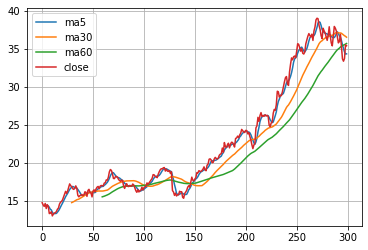

In [113]:
#시각화
plt.plot(df.index, df['ma5'], label = "ma5")
plt.plot(df.index, df['ma30'], label = "ma30")
plt.plot(df.index, df['ma60'], label = "ma60")
plt.plot(df.index, df['close'], label='close')
plt.legend()
plt.grid()